#📌 Extracão

In [ ]:
import pandas as pd
import json

# Carregando os dados do arquivo JSON
with open("TelecomX_Data.json", encoding="utf-8") as file:
    data = json.load(file)

# Convertendo para DataFrame
df = pd.json_normalize(data)

# Exibindo as 5 primeiras linhas
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformação

In [ ]:
# Verificando as colunas e seus tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [ ]:
# Exibindo as colunas do DataFrame
df.columns.to_list()

['customerID',
 'Churn',
 'customer.gender',
 'customer.SeniorCitizen',
 'customer.Partner',
 'customer.Dependents',
 'customer.tenure',
 'phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod',
 'account.Charges.Monthly',
 'account.Charges.Total']

In [ ]:
# Verificando valores ausentes
df.isnull().sum()

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

In [ ]:
# Verificando se há registros duplicados
df.duplicated().sum()

np.int64(0)

In [ ]:
# Verificando valores únicos para colunas categóricas mais relevantes
colunas_categoricas = [
    'Churn',
    'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents',
    'phone.PhoneService', 'phone.MultipleLines',
    'internet.InternetService', 'internet.OnlineSecurity', 'internet.StreamingTV', 'internet.StreamingMovies',
    'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod'
]

for coluna in colunas_categoricas:
    print(f"\nValores únicos em '{coluna}':")
    print(df[coluna].value_counts(dropna=False))


Valores únicos em 'Churn':
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

Valores únicos em 'customer.gender':
customer.gender
Male      3675
Female    3592
Name: count, dtype: int64

Valores únicos em 'customer.SeniorCitizen':
customer.SeniorCitizen
0    6085
1    1182
Name: count, dtype: int64

Valores únicos em 'customer.Partner':
customer.Partner
No     3749
Yes    3518
Name: count, dtype: int64

Valores únicos em 'customer.Dependents':
customer.Dependents
No     5086
Yes    2181
Name: count, dtype: int64

Valores únicos em 'phone.PhoneService':
phone.PhoneService
Yes    6560
No      707
Name: count, dtype: int64

Valores únicos em 'phone.MultipleLines':
phone.MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64

Valores únicos em 'internet.InternetService':
internet.InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64

Valores únicos em 'internet.On

In [ ]:
# Corrigindo valores em branco na coluna 'Churn' (ex: string vazia)
df['Churn'] = df['Churn'].replace('', pd.NA)

# Removendo linhas com valores ausentes em 'Churn'
df = df.dropna(subset=['Churn'])

# Corrigindo tipo numérico da coluna de gasto total
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Verificando se após a conversão há valores nulos
df['account.Charges.Total'].isnull().sum()

# Preenchendo valores nulos de 'account.Charges.Total' com 0 (opcional)
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0)

# Garantindo valores consistentes: removendo espaços extras e padronizando strings
colunas_categoricas = df.select_dtypes(include='object').columns

for coluna in colunas_categoricas:
    df[coluna] = df[coluna].str.strip()
    df[coluna] = df[coluna].str.title()  # exemplo: "yes" → "Yes", "no" → "No"

In [ ]:
# Criando a coluna "Contas_Diarias" com base no valor mensal
df['Contas_Diarias'] = df['account.Charges.Monthly'] / 30

# Exibindo as 5 primeiras linhas para verificação
df[['account.Charges.Monthly', 'Contas_Diarias']].head()

,account.Charges.Monthly,Contas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


#📊 Carga e análise

In [ ]:
# Análise descritiva das colunas numéricas
df.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,2.158723
std,0.368612,24.559481,30.090047,2266.794470,1.003002
min,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,9.000000,35.500000,398.550000,1.183333
50%,0.000000,29.000000,70.350000,1394.550000,2.345000
75%,0.000000,55.000000,89.850000,3786.600000,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.958333


In [ ]:
# Exemplo adicional: estatísticas específicas para 'account.Charges.Total' e 'Contas_Diarias'
df[['account.Charges.Total', 'account.Charges.Monthly', 'Contas_Diarias']].describe()

,account.Charges.Total,account.Charges.Monthly,Contas_Diarias
count,7043.000000,7043.000000,7043.000000
mean,2279.734304,64.761692,2.158723
std,2266.794470,30.090047,1.003002
min,0.000000,18.250000,0.608333
25%,398.550000,35.500000,1.183333
50%,1394.550000,70.350000,2.345000
75%,3786.600000,89.850000,2.995000
max,8684.800000,118.750000,3.958333


In [ ]:
# Verificando a mediana separadamente
df[['account.Charges.Total', 'account.Charges.Monthly', 'Contas_Diarias']].median()

account.Charges.Total      1394.550
account.Charges.Monthly      70.350
Contas_Diarias                2.345
dtype: float64

C:\Users\Ro\AppData\Local\Temp\ipykernel_27208\3877530537.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Churn', palette='pastel')


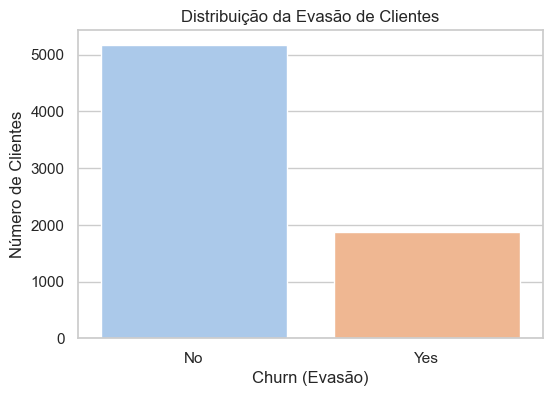

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando o estilo dos gráficos
sns.set(style="whitegrid")

# Plotando a contagem de clientes que saíram ou não
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='Churn', palette='pastel')
plt.title('Distribuição da Evasão de Clientes')
plt.xlabel('Churn (Evasão)')
plt.ylabel('Número de Clientes')
plt.show()

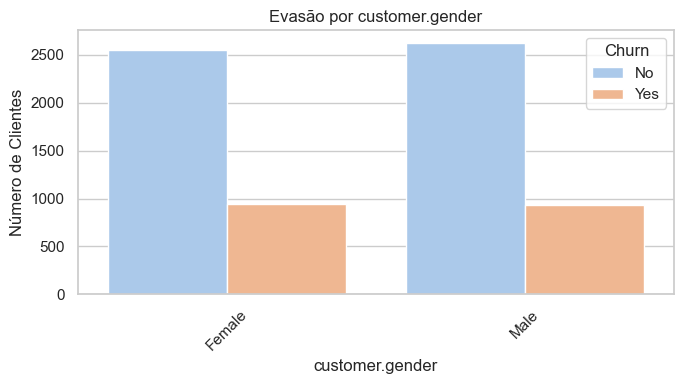

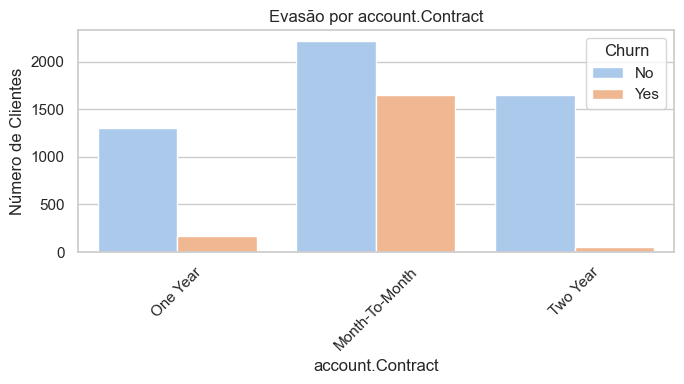

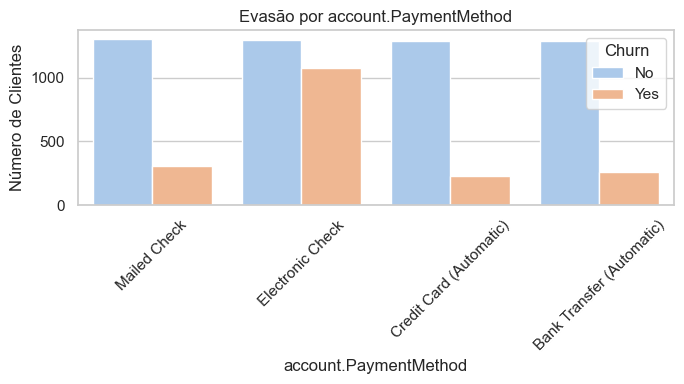

In [ ]:
# Função para gerar gráficos de contagem por variável categórica
def grafico_churn_por_categoria(coluna):
    plt.figure(figsize=(7, 4))
    sns.countplot(data=df, x=coluna, hue='Churn', palette='pastel')
    plt.title(f'Evasão por {coluna}')
    plt.xticks(rotation=45)
    plt.ylabel('Número de Clientes')
    plt.xlabel(coluna)
    plt.legend(title='Churn')
    plt.tight_layout()
    plt.show()

# Exemplo com algumas variáveis
categorias = [
    'customer.gender',
    'account.Contract',
    'account.PaymentMethod'
]

for coluna in categorias:
    grafico_churn_por_categoria(coluna)

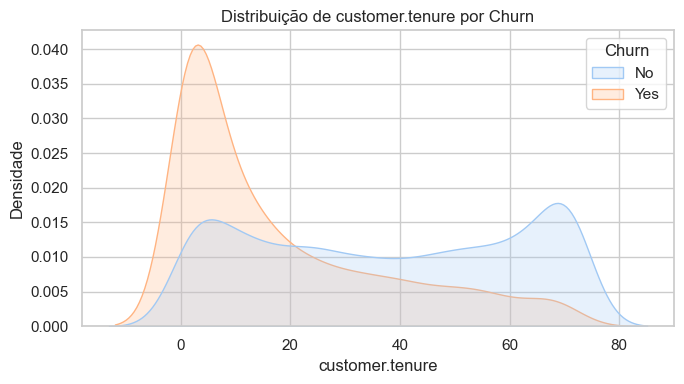

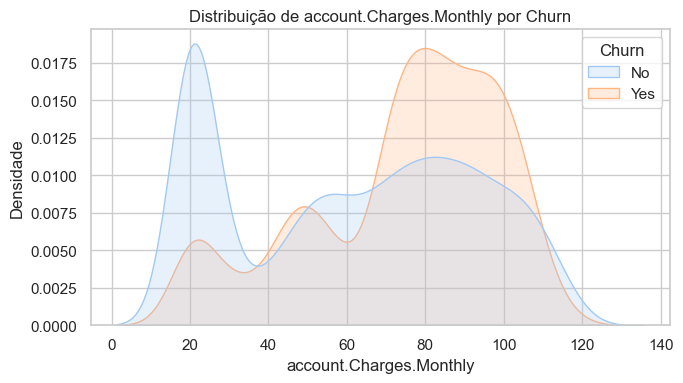

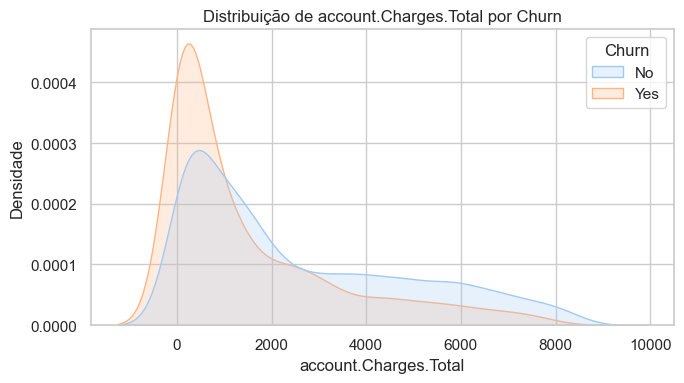

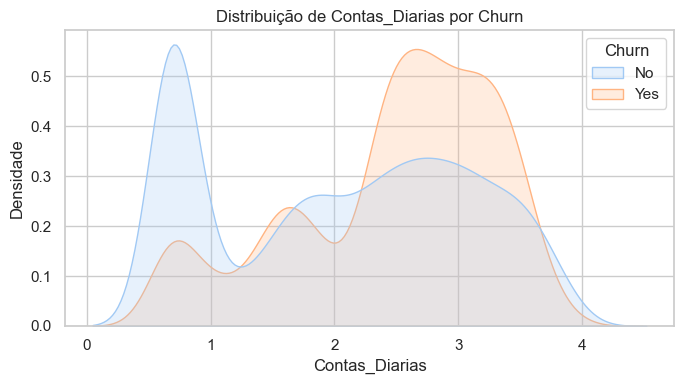

In [ ]:
# Função para gráficos de densidade por variável numérica
def grafico_densidade_por_churn(coluna):
    plt.figure(figsize=(7, 4))
    sns.kdeplot(data=df, x=coluna, hue='Churn', fill=True, common_norm=False, palette='pastel')
    plt.title(f'Distribuição de {coluna} por Churn')
    plt.xlabel(coluna)
    plt.ylabel('Densidade')
    plt.tight_layout()
    plt.show()

# Variáveis numéricas para análise
variaveis_numericas = [
    'customer.tenure',
    'account.Charges.Monthly',
    'account.Charges.Total',
    'Contas_Diarias'
]

# Plotando
for coluna in variaveis_numericas:
    grafico_densidade_por_churn(coluna)

#📄Relatorio Final

## Introdução

A análise a seguir foi realizada para apoiar o projeto "Churn de Clientes" da empresa Telecom X, que enfrenta um alto índice de cancelamentos de contratos.

Nosso objetivo foi entender os fatores que levam os clientes a deixarem a empresa, identificando padrões comportamentais e variáveis associadas à evasão (churn). Com esses insights, a equipe de Data Science poderá desenvolver modelos preditivos e estratégias de retenção.

## Limpeza e Tratamento de Dados

- Os dados foram extraídos de um arquivo JSON fornecido pela Telecom X.
- Estrutura aninhada convertida em DataFrame com `pd.json_normalize`.
- Foram identificados e tratados:
- Valores nulos em `Churn` e `account.Charges.Total`.
- Inconsistências em textos (ex: espaços e capitalização).
- Conversões de tipos e criação da variável `Contas_Diarias`.

## Análise Exploratória de Dados (EDA)

- Análise descritiva revelou média, mediana e dispersão nos gastos e tempo de contrato.
- A variável `Churn` mostra desequilíbrio entre clientes que saíram e os que permaneceram.
- Clientes com contratos mensais, sem parceiro ou dependentes, e com menos tempo de contrato, tendem a cancelar mais.
- Variáveis como `Contract`, `PaymentMethod` e `InternetService` estão fortemente associadas ao churn.

## Conclusões e Insights

- A maioria dos clientes que cancelam tem contrato mensal e opta por débito eletrônico.
- Clientes com menor tempo de permanência e menor gasto total apresentam maior evasão.
- A ausência de serviços adicionais (ex: backup online, segurança, suporte) também aparece com mais frequência entre clientes que cancelaram.

Esses padrões são importantes para segmentar clientes em risco e planejar ações preventivas.

## Recomendações

- Oferecer benefícios ou descontos para clientes com contratos mensais migrarem para contratos anuais ou bianuais.
- Investir em campanhas de engajamento para usuários com pouco tempo de permanência.
- Estimular a adesão a serviços adicionais com pacotes promocionais.
- Avaliar a experiência de clientes que optam por pagamento via débito eletrônico, buscando entender pontos de atrito.